Importing & Loading

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
df = pd.read_csv('car_dataset.csv')
display(df.head())


Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

Exploration

In [56]:

print("Data Shape:", df.shape)
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())
print("\nData Types of Columns:")
print(df.dtypes)

print("\nMissing Values per Column:")
print(df.isnull().sum())


print("\nTarget Variable:")
print("I choose 'Selling_Price' as the target variable.  This is a regression task, as the goal is to predict a continuous numerical value (the selling price of a car) based on the other features.  The 'Selling_Price' column directly represents the price a car was sold for and seems the most logical target for predicting car prices.")


categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
print("\nCategorical Feature Exploration:")
for col in categorical_cols:
    print(f"\nUnique values and frequencies for '{col}':")
    print(df[col].value_counts())

numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven']
print("\nNumerical Feature Exploration:")
for col in numerical_cols:
    print(f"\nStatistics for '{col}':")
    print(df[col].describe())

print("\nCorrelation Matrix for Numerical Features:")
display(df[numerical_cols].corr())

Data Shape: (301, 9)

Descriptive Statistics for Numerical Features:


Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


Data Types of Columns:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

Missing Values per Column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Target Variable:
I choose 'Selling_Price' as the target variable.  This is a regression task, as the goal is to predict a continuous numerical value (the selling price of a car) based on the other features.  The 'Selling_Price' column directly represents the price a car was sold for and seems the most logical target for predicting car prices.

Categorical Feature Exploration:

Unique values and frequencies for 'Fuel_Type':
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Unique values and 

Selling_Price  Present_Price  Kms_Driven
Selling_Price       1.000000       0.878983    0.029187
Present_Price       0.878983       1.000000    0.203647
Kms_Driven          0.029187       0.203647    1.000000

Cleaning

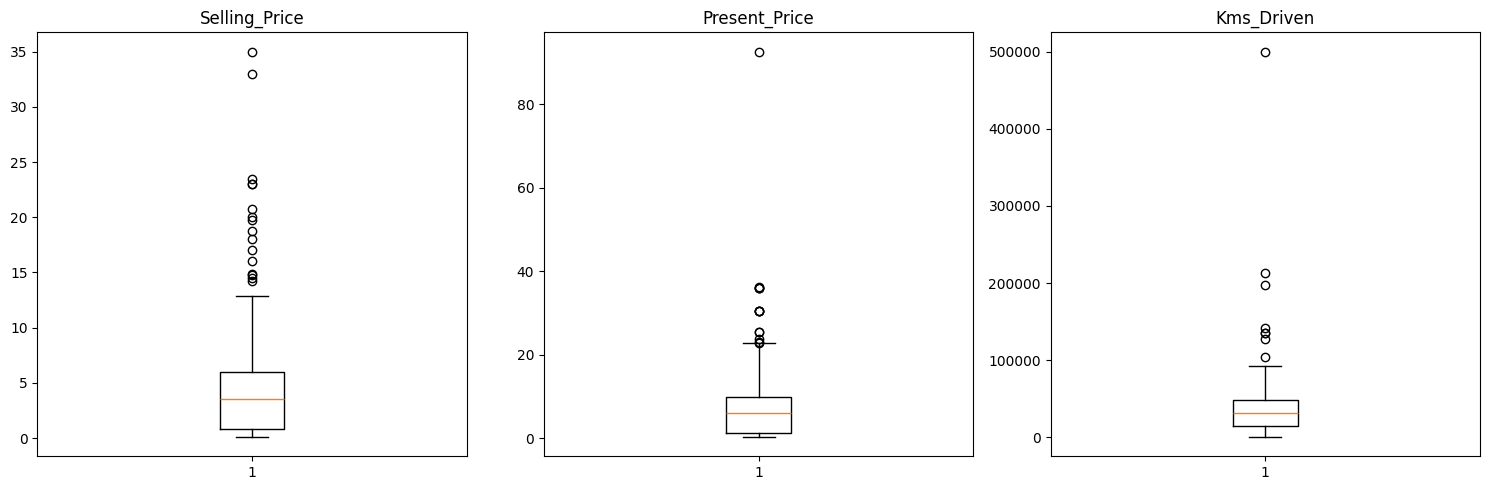

In [57]:
for col in ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

df.drop_duplicates(inplace=True)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
for col in ['Selling_Price', 'Present_Price', 'Kms_Driven']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(15, 5))
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven']
for i, col in enumerate(numerical_cols):
  plt.subplot(1, 3, i + 1)
  plt.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

def cap_outliers(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + factor * iqr
    lower_bound = q1 - factor * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

df['Present_Price'] = cap_outliers(df['Present_Price'])
df['Kms_Driven'] = cap_outliers(df['Kms_Driven'])

Feature engeenering


In [58]:
df['Car_Age'] = 2025 - df['Year']

categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df['Kms_Driven_Log'] = np.log1p(df['Kms_Driven'])
df['Present_Price_Log'] = np.log1p(df['Present_Price'])

Data splitting

In [59]:
y = df['Selling_Price']
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.7, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, train_size=0.5, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (209, 11)
y_train shape: (209,)
X_val shape: (45, 11)
y_val shape: (45,)
X_test shape: (45, 11)
y_test shape: (45,)


Model tranining


In [60]:
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

Model optimization

In [61]:
#Random forest
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
}

#Gradient boosting
gb_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'learning_rate': uniform(0.01, 0.3),
}

rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
)
rf_random_search.fit(X_val, y_val)
best_rf_model = rf_random_search.best_estimator_
print("Best RandomForestRegressor hyperparameters:", rf_random_search.best_params_)
print("Best RandomForestRegressor CV score:", rf_random_search.best_score_)

gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
)
gb_random_search.fit(X_val, y_val)
best_gb_model = gb_random_search.best_estimator_
print("\nBest GradientBoostingRegressor hyperparameters:", gb_random_search.best_params_)
print("Best GradientBoostingRegressor CV score:", gb_random_search.best_score_)

Best RandomForestRegressor hyperparameters: {'max_depth': 16, 'min_samples_split': 3, 'n_estimators': 82}
Best RandomForestRegressor CV score: -1.7003709597035388

Best GradientBoostingRegressor hyperparameters: {'learning_rate': np.float64(0.15917455176771564), 'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 162}
Best GradientBoostingRegressor CV score: -0.7399856699414153


Model evaluation


In [62]:
rf_predictions = best_rf_model.predict(X_test)
gb_predictions = best_gb_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"RandomForestRegressor MSE: {rf_mse}")
print(f"RandomForestRegressor R2: {rf_r2}")
print(f"GradientBoostingRegressor MSE: {gb_mse}")
print(f"GradientBoostingRegressor R2: {gb_r2}")


RandomForestRegressor MSE: 11.326829401841344
RandomForestRegressor R2: 0.6347521263879217
GradientBoostingRegressor MSE: 9.404578804159314
GradientBoostingRegressor R2: 0.6967375168661054


A try to make the model get better results

In [63]:


param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
}


gb_model = GradientBoostingRegressor(random_state=42)


grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R-squared:", r2)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Test MSE: 48.35434996040711
Test R-squared: -0.5592468886360975
